In [1]:
import pickle

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Visualizing `V` matrix from MASE on `aff` mapped on to cortex

In [2]:
with open('./models/mpi_mase_aff_model.pkl', 'rb') as f:
    model = pickle.load(f)

/home/j1c/graphstats/graspy/graspy/plot/__init__.py:9: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use("Agg")


In [4]:
embeddings = model.latent_left_
embeddings.shape

(18715, 4)

In [11]:
# plot on fsa5 surface:
from nilearn import datasets, plotting
fsa5 = datasets.fetch_surf_fsaverage()

/home/j1c/graphstats/venv/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


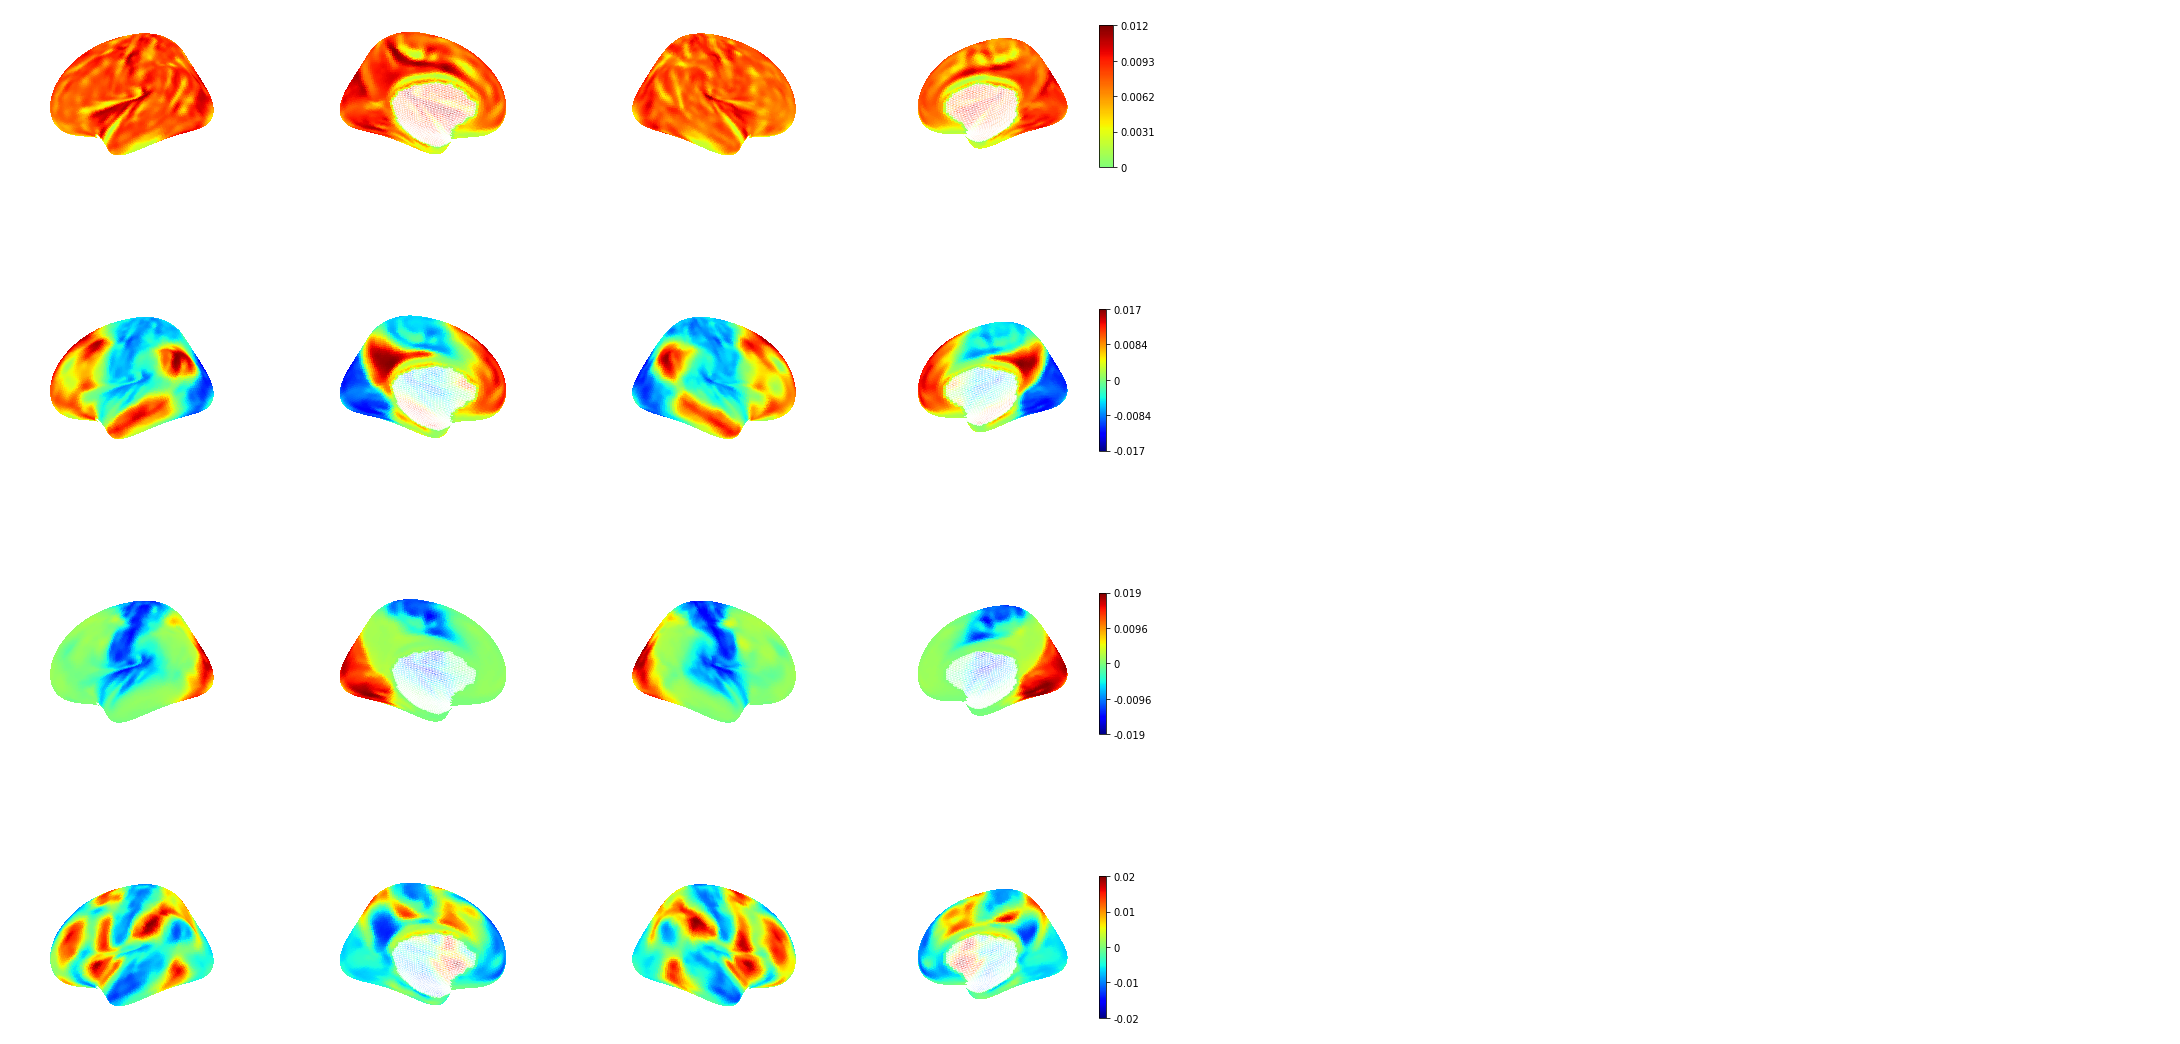

In [12]:
fig, axes = plt.subplots(4, 4, subplot_kw={'projection': '3d'}, figsize=(20, 20))

for i in range(4):
    ax = axes[i]
    X = embeddings[:, i]
    

    cortex_left = nib.freesurfer.read_label('lh.cortex.label')

    conn_map = np.zeros(10242)
    conn_map[cortex_left] = X[:len(cortex_left)]

    plotting.plot_surf_stat_map(fsa5.infl_left, 
      conn_map, hemi='left', colorbar=False, cmap='jet', axes = ax[0])

    plotting.plot_surf_stat_map(fsa5.infl_left,
      conn_map, hemi='left', colorbar=False, cmap='jet', view='medial', axes=ax[1])

    cortex_right = nib.freesurfer.read_label('rh.cortex.label')

    conn_map = np.zeros(10242)
    conn_map[cortex_right] = X[len(cortex_left):]

    plotting.plot_surf_stat_map(fsa5.infl_right, 
      conn_map, hemi='right', colorbar=False, cmap='jet', axes = ax[2])

    plotting.plot_surf_stat_map(fsa5.infl_right,
      conn_map, hemi='right', colorbar=True, cmap='jet', view='medial', axes=ax[3])

In [14]:
fig.savefig('./figures/mase_aff_brain_plot.png', dpi=200)